#                                  Analysis of Denver Crimes from the past five years. 



# Dataset
The dataset that was used for this report is all the criminal offenses in the City and County of Denver for the previous five calendar years plus the current year to date. There are 508143 counts of crimes.  The dataset was downloaded on 08/26/2019. The crime data is updated Monday through Friday.  Data is collected by the Denver Police Department. Data that is withheld from this dataset are addresses of sexual assaults and child abuse cases, and other crimes which by their nature involve juveniles, or which the reports indicate involve juveniles as victims, suspects, or witnesses, are not reported at all. The dataset is chosen because I live in close to Denver and  I would think it would nice to know what crimes are common in Denver. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('crime.csv' ,delimiter=',')
df.head()
#source:https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [3]:
df.describe()
# The Offense code is used to specify a crime using numbers. While incident ID and offense ID are used as unique ids. 
# There are seven different districts for Denver. The crimes are marked as crime or traffic crimes. 
# When there is a 1 under IS_CRIME, it means the offense was a crime. 0 means it is not a crime. 
#It is vice versa with IS_TRAFFIC. Also an offense can be both crime and traffic offense. 



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC
count,5.081430e+05,5.081430e+05,508143.000000,508143.000000,5.039570e+05,5.039570e+05,503957.000000,503957.000000,508143.00000,508143.000000,508143.000000,508143.000000
mean,3.819739e+09,3.819739e+15,3829.568187,0.205326,3.163839e+06,1.695292e+06,-104.927151,39.718957,3.49613,367.109884,0.740052,0.260484
std,1.005475e+10,1.005475e+16,1656.411755,0.578660,6.932705e+05,1.705978e+05,1.940106,0.734706,1.77431,178.162495,0.438606,0.438899
min,2.015800e+04,2.015854e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-115.464060,0.000001,1.00000,111.000000,0.000000,0.000000
25%,2.015143e+09,2.015143e+15,2305.000000,0.000000,3.138298e+06,1.683101e+06,-105.008257,39.707698,2.00000,221.000000,0.000000,0.000000
50%,2.016736e+09,2.016736e+15,3572.000000,0.000000,3.145575e+06,1.694779e+06,-104.982413,39.739773,3.00000,323.000000,1.000000,0.000000
75%,2.018567e+09,2.018567e+15,5441.000000,0.000000,3.161896e+06,1.701642e+06,-104.924425,39.758589,5.00000,521.000000,1.000000,1.000000
max,2.019519e+12,2.019519e+18,7399.000000,5.000000,4.067476e+07,1.141836e+07,-0.000001,39.904311,7.00000,759.000000,1.000000,1.000000


The total offenses collected in this dataset is 508143. 

In [11]:

import time

start = time.perf_counter()
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])
print(time.perf_counter() - start)
start = time.perf_counter()
print(df['REPORTED_DATE'].min(), df['REPORTED_DATE'].max())
print(time.perf_counter() - start)

0.005457899999782967
2014-01-02 00:36:00 2019-08-26 08:00:00
0.0033386999998583633


In [13]:
# Oldest record is 01/02/2014 and the most current record is 08/26/2019

#  1.Which time of year that Denver has the most crimes?  Is the rate of crimes constant or changing yearly?

In [17]:
pd.options.display.max_rows = None
month_data = df.groupby([df['REPORTED_DATE'].dt.year.rename('year'), df['REPORTED_DATE'].dt.month.rename('month')]).agg({'count'})
month_data_counts = pd.DataFrame(month_data['REPORTED_DATE'])
month_data_counts

count
year month       
2014 1       5642
     2       5536
     3       6466
     4       6601
     5       7136
     6       7153
     7       7572
     8       7808
     9       7650
     10      7679
     11      6396
     12      6714
2015 1       7209
     2       6082
     3       7053
     4       7445
     5       7611
     6       7690
     7       8016
     8       8111
     9       7733
     10      8177
     11      7121
     12      6923
2016 1       7577
     2       7065
     3       7418
     4       7739
     5       8054
     6       7710
     7       7559
     8       8084
     9       8062
     10      8123
     11      7010
     12      6996
2017 1       7563
     2       6847
     3       7661
     4       7442
     5       8206
     6       8094
     7       8070
     8       8733
     9       8012
     10      8060
     11      7386
     12      7134
2018 1       7651
     2       6838
     3       7474
     4       7863
     5       8507
     6       7900
     7       8437
     8       8459
     9       8139
     10      8057
     11      7232
     12      6969
2019 1       7562
     2       6569
     3       7059
     4       7211
     5       7548
     6       7733
     7       8164
     8       6642

In 2014-2017, the month of August has the most crimes occur of their respective year. It was September for 2018 and July for 2019. Eventhough the current record is 08/26/2019. I highly doubt it would surpass July if I waited for five more days. The time of year that has the most crime rates is around the summer time. The summer time is when Colorado would have the warmest weather of the year and attract tons of tourist. It makes sense that around that time of year, Denver would have tons of people outside. While the winter months, people would just stay inside. 

In [20]:
year_data =df.groupby([df['REPORTED_DATE'].dt.year.rename('year')]).agg({'count'})
year_data_counts = pd.DataFrame(year_data['REPORTED_DATE'])
year_data_counts

,count
year,
2014,82353
2015,89171
2016,91397
2017,93208
2018,93526
2019,58488


In [39]:
from IPython.display import Image
Denver_Population_png= 'Denver Population.png'
Image(url=Denver_Population_png)
# Source: http://worldpopulationreview.com/us-cities/denver-population/

In [33]:
pd.read_csv('total_crimes_year.csv')

,Year,Total Crimes,Growth,Annual Growth Rate
0,2018,93526,318.0,0.341172
1,2017,93208,1811.0,1.981465
2,2016,91397,2226.0,2.496327
3,2015,89171,6818.0,8.278994
4,2014,82353,NaN,NaN


The rate of the population growth and the rate of the crimes growth rate both increase every year. The four years are used to calculate the rates. Since the dataset only goes back to 2014. 2017 and 2016 have the rate of the population growth and the rate of the growth of the crime to have a difference less than 1%. While in 2018, the difference is 1.23%. Then there is an anomaly for 2014, and the difference is 5.55 %. There could have some kind of event that happens in 2015 to have a huge jump in crimes growth rate. I have done a quick google search what happened 2015 but I didn't see anything significant that affect crimes. According to this dataset, the crimes are decreasing in crimes growth rate. 

Text(0.5, 1.0, 'Total Crimes by Year')

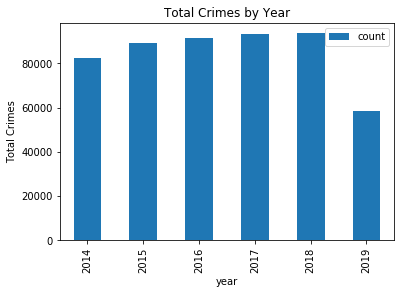

In [44]:
year_data_counts.plot(kind='bar')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Year')

This is the bar graph to visualize growth rate year by year. 2019 only goes up to 08/26/2019 when the dataset was collected. I would imagine in the future with the three months would look similar. 

# 2.Which parts of Denver that has the most crimes and why?

In [38]:
neighborhood_data = df['NEIGHBORHOOD_ID']
neighborhood_data.value_counts().head(10)

five-points     26655
stapleton       21855
cbd             18847
capitol-hill    17526
montbello       17292
baker           13926
lincoln-park    13645
east-colfax     13273
westwood        12505
civic-center    12158
Name: NEIGHBORHOOD_ID, dtype: int64

This is the top ten neighborhoods with the most crimes in Denver. 

In [40]:
Denver_neighborhoods_gif = 'Denver_neighborhoods.gif'
Image(url=Denver_neighborhoods_gif)

This is the map of all the neighborhoods in Denver.

In [43]:
Police_Stations_png = 'Police_Stations.png'
Image(url=Police_Stations_png)
#Source: https://www.denvergov.org/maps/map/police

This is the map of the seven districts. 

In [48]:
district_id_data = df['DISTRICT_ID']
district_counts = district_id_data.value_counts()
district_counts

3    112481
6    102138
1     89442
2     74486
4     71901
5     51810
7      5885
Name: DISTRICT_ID, dtype: int64

This is the total number of crimes in the seven districts. Each district contain a police station and is in charge of their area. 

(-1.1104517789475725,
 1.1004977037594081,
 -1.1055105184830814,
 1.123139026403241)

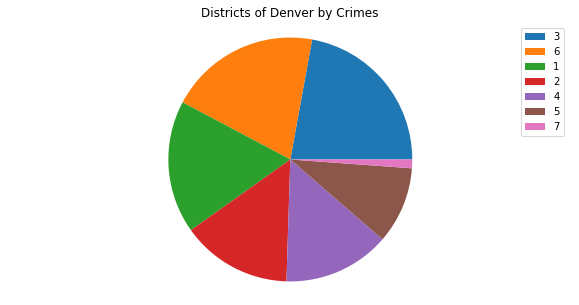

In [63]:
plt.figure(figsize=(10, 5))
plt.pie(district_counts)
plt.legend(district_counts.index)
plt.title('Districts of Denver by Crimes')
plt.axis('equal')

This is the pie chart to show visually the percentage each district has for the total crimes in Denver.

Based on the dataset, the top ten neighborhoods with most crimes are determined and visualized by the map. Since the neighborhoods are very small in scale, the seven districts were used to bring the location of Denver to be broader. The total counts are shown that district 3has the most crimes and district 6 was close. I would assume that the neighborhoods with a high population would have more crimes compare to the neighborhood with less population. For example, Five-points and Stapleton are top 2 with the most crimes based on statisticalatlas.com and they have a high population in Denver. While College View has a high population, it didn't crack top ten in Denver for most crimes. There's more than one thing that affects the crime rates in Denver. It would be interesting to compare the income, poverty rates, etc. in the neighborhoods to see the correlation. Unfortunately, there isn't another reliable dataset to use.
Source: https://statisticalatlas.com/county/Colorado/Denver-County/Population 


# 3.What type of crimes is occurring? Would the type of crime change the perception of how dangerous the city?

In [60]:
import statistics
statistics.mode(df['OFFENSE_TYPE_ID'])

'traffic-accident'

Most common offense that occur in Denver is traffic-accident.

In [61]:
df.IS_CRIME.value_counts()

1    376052
0    132091
Name: IS_CRIME, dtype: int64

376052 offenses are considered by crime by the Denver Police Department. 132091 offenses are traffic offenses. Some of the traffic offenses like DUI and Hit and Run are not conisidered as crimes. 

In [56]:
offense_category = df.OFFENSE_CATEGORY_ID.value_counts()
offense_category

traffic-accident                132091
all-other-crimes                 92125
public-disorder                  52919
larceny                          51465
theft-from-motor-vehicle         38415
drug-alcohol                     33433
auto-theft                       27060
burglary                         25061
other-crimes-against-persons     24962
aggravated-assault               12028
white-collar-crime                6874
robbery                           6580
sexual-assault                    4192
arson                              638
murder                             300
Name: OFFENSE_CATEGORY_ID, dtype: int64

These are all the categories of crimes that occur in Denver. All other crimes varied from loitering, littering, kidnapping,etc. There all over the place. Denver Police Department has a csv file of all possible crimes listed. They're 299 counts. 

Text(0.5, 1.0, 'Total Crimes by Category')

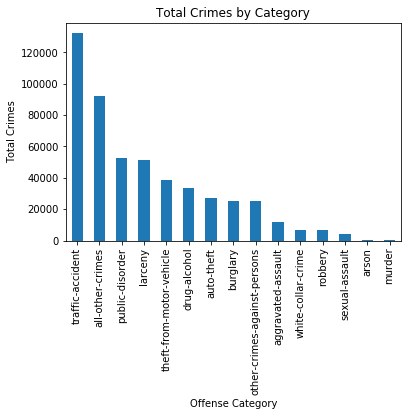

In [58]:
offense_category.plot(kind='bar')
plt.ylabel('Total Crimes')
plt.xlabel('Offense Category')
plt.title('Total Crimes by Category')

This is the bargraph that shows the total number of crimes that occur in Denver sorted in catergories. 

The most crimes that occur mostly in Denver are traffic accidents. Then, second, it is all other crimes. All other crimes can be littering, loitering, gambling, kidnapping, etc according to the Denver Police Station. It would be difficult to say Denver is getting more dangerous just by looking at the numbers. Let's say littering increase 100% next year. Technically the crime rate in Denver is increasing. Is Denver really getting more dangerous? The categories should be reworked in my opinion. 

#   Proposal 

Overall, this project I managed to answer most of my questions but I couldn't get clear answers on some of them due to lack of data science techniques and knowledge. 
Question 2 I couldn't give a clear answer to answer why some areas in Denver have higher crimes than other areas. I would like to learn about web scraping. So would be able to collect other factors that affect crimes like income, poverty level, population more in detail, etc. Once I learned that technique I would be able to answer my question.
Then for question 3, I need to organize the type of crimes into better categories to gauge to see Denver is getting more dangerous or not. I'm hoping I can learn a technique that I don't manually enter each entry to my custom category. Using the T-test would be a great tool to learn and helpful to answer my question. 

# Conclusion

The dataset was collected from the Denver Police Station. The time of year when crimes most occurred is in the summertime. The rate of crimes is decreasing every year from 2014-2018. The Five-Points in the neighborhood that has the most crimes in Denver and District 3 has the most crimes out of the 7 districts. The population is for why certain areas have more crimes but not the only factor though. The most common crimes occurred under traffic-accident. Due to the crime categories not organized into numeric danger level hard to determine Denver is dangerous. Keep in mind the data were inputted by the Denver Police Stations. There could be some mistakes entering some data and also there could be crimes never gets reported. Overall it would be hard to get an actual number of crimes. 